In [1]:
%run d:/Work/Java/SOA/Homew6/homew6.py

Point  = ([-0.19433351 -4.80450996])
Value = 23.12108


In [10]:

nr_iterations=[50,100,500]
functions=[func_spehre,func_rosenbrock,func_rastrigin,func_griewank]
bounds={
    'func_spehre':{'low':[-20,-20],'up':[20,20]},
    'func_rosenbrock':{'low':[-30,-30],'up':[30,30]},
    'func_rastrigin':{'low':[-5.12,-5.12],'up':[5.12,5.12]},
    'func_griewank':{'low':[-200,-200],'up':[200,200]}
}

NR_CATS = 100
SMP = 50  # seeking memory pool
SRD = 0.15  # seeking range of the selected dimension
CDC = 2  # counts of dimensions to change
SPC = True  # Self-Position Consideration
C1 = 0.4  # Tracing mode constant
MR = 0.2  # mixture ratio

V_MAX = 100

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_table(columns,data,title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    row_labels = None
    table_vals = data

    # Draw table
    the_table = plt.table(cellText=data,
                          colWidths=[0.2,0.1,0.35,0.2,0.2],
                          rowLabels=None,
                          colLabels=columns,
                          loc='bottom',
                            cellLoc = 'left')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(22)
    the_table.scale(4, 4)

    # Removing ticks and spines enables you to get the figure only with table
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.text(-1,1,title,fontsize=25)
    plt.savefig('CSO.jpg')
    plt.show()

Function func_spehre
['func_spehre', 50, '-1.223015e-01 / -8.824461e-02', '2.274476e-02', '1.089246e+00']
['func_spehre', 100, '-2.135312e-02 / -3.103108e-02', '1.418884e-03', '2.007845e-01']
['func_spehre', 500, '6.095147e-04 / 9.733873e-04', '1.318991e-06', '9.889107e-05']
Function func_rosenbrock
['func_rosenbrock', 50, '1.192893e+00 / 1.191703e+00', '9.070347e+00', '3.732096e+02']
['func_rosenbrock', 100, '8.550672e-01 / 6.917253e-01', '2.255903e+00', '2.717436e+02']
['func_rosenbrock', 500, '9.879359e-01 / 9.757728e-01', '1.456031e-02', '3.565382e+00']
Function func_rastrigin
['func_rastrigin', 50, '-3.750249e-02 / 5.288441e-02', '8.275382e-01', '4.908781e+00']
['func_rastrigin', 100, '-4.992261e-02 / 9.848680e-01', '1.505555e+00', '6.203279e+00']
['func_rastrigin', 500, '1.320366e-02 / 5.915515e-02', '7.208915e-01', '8.313536e+00']
Function func_griewank
['func_griewank', 50, '-1.227890e+01 / 3.290223e-01', '9.170361e-02', '5.062645e-01']
['func_griewank', 100, '-2.833845e+00 / -

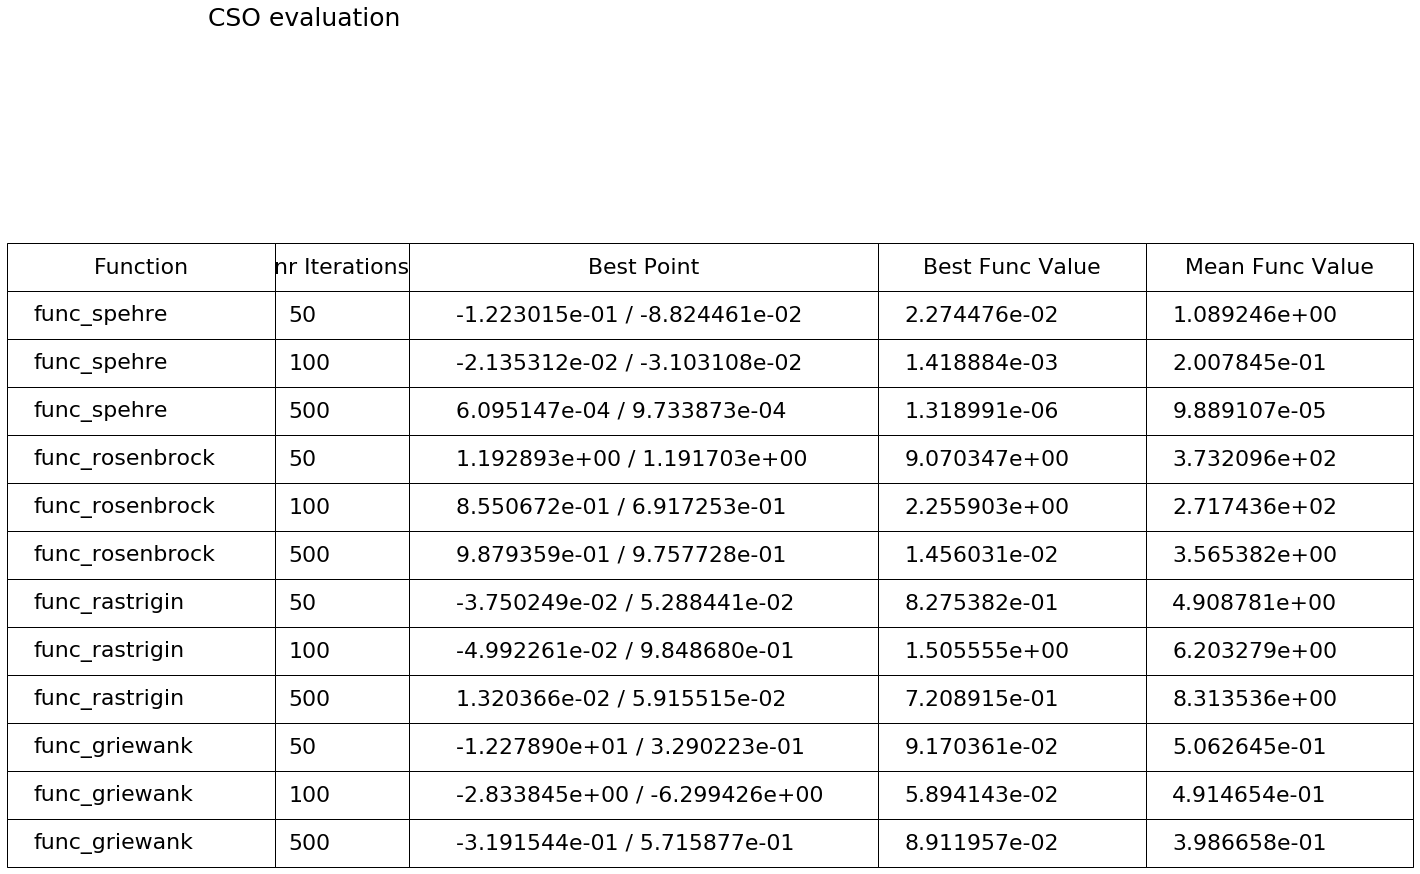

In [19]:
import numpy as np

data=[]
for func in functions:
    print("Function %s" % func.__name__)
    
    columns=('Function', 'nr Iterations', 'Best Point', 'Best Func Value', 'Mean Func Value')
    bb = bounds[func.__name__]
    
    
    for nr in nr_iterations:
        d=[func.__name__, nr]
        best_pos = None
        best_val = None
        vals =[]
        
        for i in range(0,30):
            bp, bv, _ = Dispatcher(costFunc=func, nr_dimensions=2, bounds_down=bb['low'], bounds_up=bb['up']).run(nr_iterations=nr)
            vals.append(bv)
            if (best_val is None) or (bv<best_val):
                best_pos = bp
                best_val = bv
                
        d.append("%e / %e" % (best_pos[0],best_pos[1]))
        d.append("%e" % best_val)
        d.append("%e" % np.mean(vals))

        data.append(d)
        print(d)
                
plot_table(columns,data,"CSO evaluation")
print("\n")
    

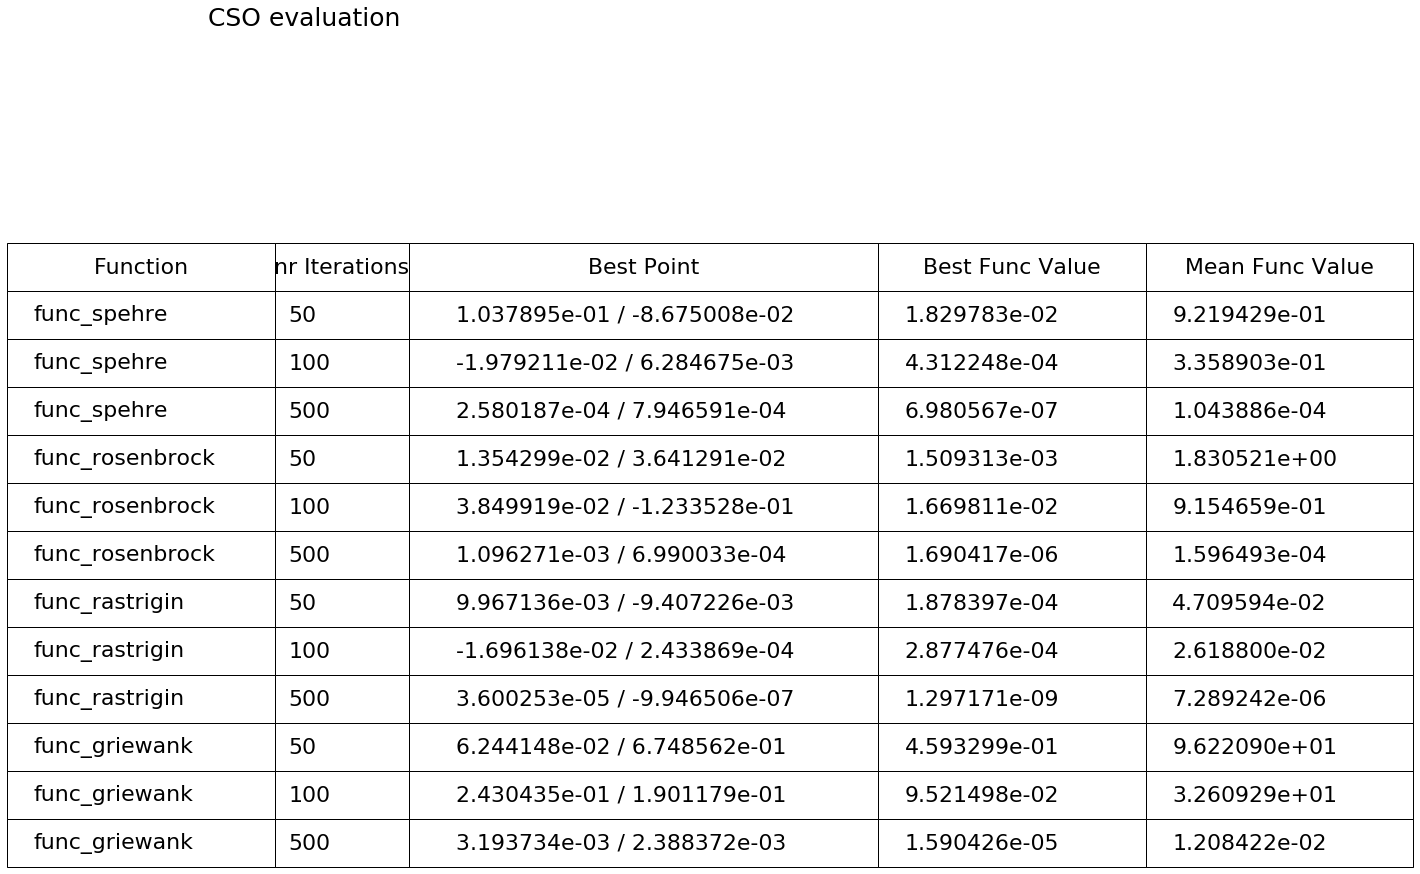

In [18]:
plot_table(columns,data,"CSO evaluation")


In [16]:
plt.savefig('xx.png')

<Figure size 432x288 with 0 Axes>